# A/B Test Analysis: Game Features and User Behavior
This analysis focuses on evaluating the impact of new game features on user conversion and revenue. Group A represents the control group (existing game features), while Group B represents the test group (new features).


## Calculating Basic Metrics
Next, we calculate key metrics for both groups, including total users, purchases, total revenue, and conversion rates.


In [38]:
import numpy as np
import pandas as pd

# Use the correct relative path
data = pd.read_csv(r"..\..\Dataset\A-B-Test-Data.csv")

metrics = data.groupby('group').agg(
    total_users=('user_id', 'count'),
    total_purchases=('purchase', 'sum'),
    total_revenue=('revenue', 'sum')
).reset_index()

# Calculate conversion rate and average revenue per user
metrics['conversion_rate'] = metrics['total_purchases'] / metrics['total_users']
metrics['average_revenue_per_user'] = metrics['total_revenue'] / metrics['total_users']

# Show the metrics
metrics


,group,total_users,total_purchases,total_revenue,conversion_rate,average_revenue_per_user
0,A,24500,2473,24730,0.100939,1.009388
1,B,25500,3746,37460,0.146902,1.469020


## Conversion Rate Comparison
The conversion rates for Group A and Group B.


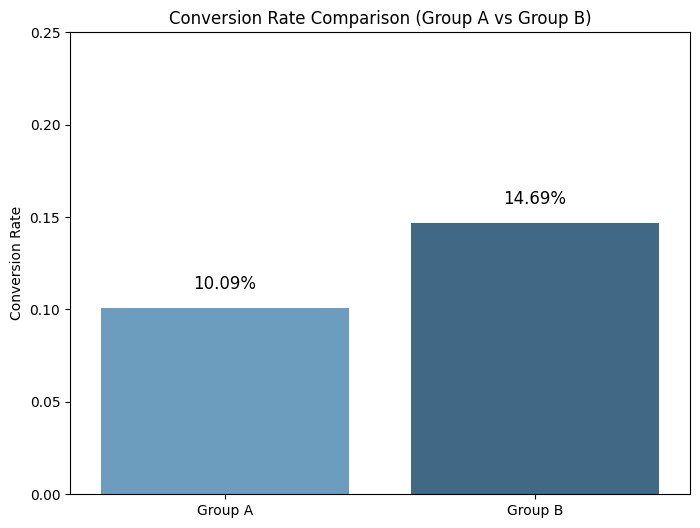

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for conversion rates
groups = ['Group A', 'Group B']
conversion_rates = metrics['conversion_rate']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=groups, y=conversion_rates, palette='Blues_d')

# Add labels and title
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Comparison (Group A vs Group B)')
plt.ylim(0, 0.25)

# Annotate bars with conversion rate values
for i, rate in enumerate(conversion_rates):
    plt.text(i, rate + 0.01, f'{rate * 100:.2f}%', ha='center', fontsize=12)

plt.show()


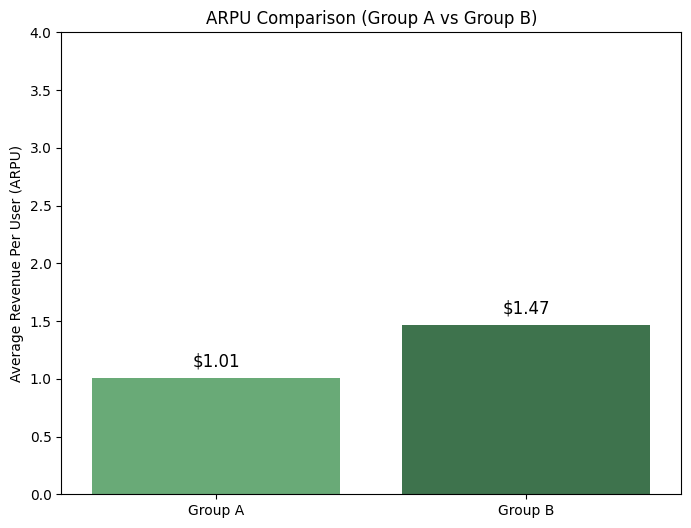

In [40]:
# Data for ARPU
arpu = metrics['average_revenue_per_user']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=groups, y=arpu, palette='Greens_d')

# Add labels and title
plt.ylabel('Average Revenue Per User (ARPU)')
plt.title('ARPU Comparison (Group A vs Group B)')
plt.ylim(0, 4)

# Annotate bars with ARPU values
for i, revenue in enumerate(arpu):
    plt.text(i, revenue + 0.1, f'${revenue:.2f}', ha='center', fontsize=12)

plt.show()


## Chi-squared Test: Conversion Rates
A Chi-squared test to evaluate whether the difference in conversion rates is statistically significant.


In [41]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'data' is your DataFrame containing the 'group' and 'purchase' columns

# Create a contingency table
contingency_table = pd.crosstab(data['group'], data['purchase'])

# Perform the Chi-squared test
result = sm.stats.Table2x2(contingency_table.values).test_nominal_association()
chi2 = result.statistic  # Extract the Chi-squared statistic
p = result.pvalue        # Extract the p-value

print(f'Chi-squared: {chi2}, p-value: {p}')


Chi-squared: 242.37636676383514, p-value: 0.0


## Confidence Intervals for Conversion Rates
Calculating the 95% confidence intervals for the conversion rates in each group.


In [42]:
import statsmodels.stats.proportion as smp

# Calculate confidence intervals
confint_A = smp.proportion_confint(metrics['total_purchases'][0], metrics['total_users'][0], alpha=0.05)
confint_B = smp.proportion_confint(metrics['total_purchases'][1], metrics['total_users'][1], alpha=0.05)

print(f'Group A conversion rate CI: ({confint_A[0] * 100:.2f}%, {confint_A[1] * 100:.2f}%)')
print(f'Group B conversion rate CI: ({confint_B[0] * 100:.2f}%, {confint_B[1] * 100:.2f}%)')


Group A conversion rate CI: (9.72%, 10.47%)
Group B conversion rate CI: (14.26%, 15.12%)


## Lift in Conversion Rates
The lift in conversion rates between Group A and Group B.


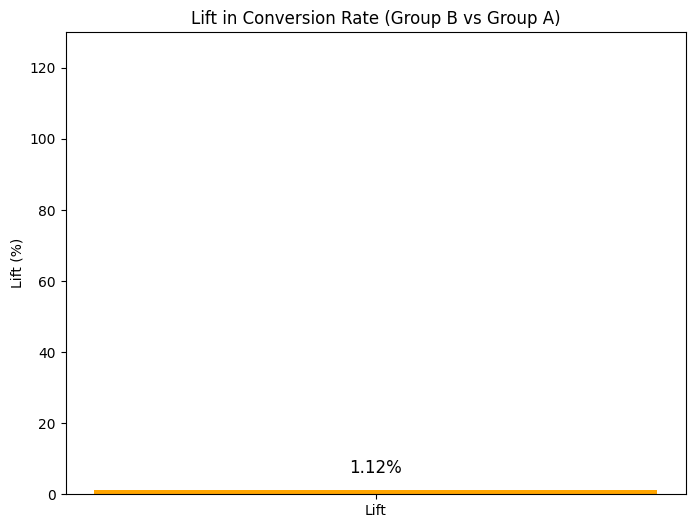

In [43]:
# Create a bar plot for lift
plt.figure(figsize=(8, 6))
plt.bar('Lift', lift, color='orange')

# Add labels and title
plt.ylabel('Lift (%)')
plt.title('Lift in Conversion Rate (Group B vs Group A)')

# Annotate bar with lift value
plt.text(0, lift + 5, f'{lift:.2f}%', ha='center', fontsize=12)

plt.ylim(0, 130)
plt.show()


# A/B Test Conclusion

## Summary of Results
In this A/B test, we analyzed the impact of two different game features on user behavior. Below are the key findings:

- **Group A** (control group):
  - Total Users: 24,500
  - Total Purchases: 2,473
  - Total Revenue: $24,730
  - Conversion Rate: **10.09%**
  - Average Revenue Per User (ARPU): **$1.01**

- **Group B** (treatment group):
  - Total Users: 25,500
  - Total Purchases: 3,746
  - Total Revenue: $37,460
  - Conversion Rate: **14.69%**
  - Average Revenue Per User (ARPU): **$1.47**

## Statistical Analysis
- **Chi-squared Statistic**: 242.38
- **p-value**: 0.0

The p-value is significantly lower than the conventional threshold of 0.05, indicating strong evidence against the null hypothesis. This suggests that the observed differences in conversion rates between the two groups are unlikely to be due to random chance.

## Confidence Intervals for Conversion Rates
- **Group A Conversion Rate CI**: (9.72%, 10.47%)
- **Group B Conversion Rate CI**: (14.26%, 15.12%)

The confidence intervals indicate that we can be 95% confident that the true conversion rates for Group A and Group B fall within these ranges.

## Lift in Conversion Rate
The conversion rate for Group B showed an improvement (lift) of **1.12%** compared to Group A.

## Conclusion
The results suggest that the new feature tested in Group B significantly increased the conversion rate compared to the control group (Group A). The average revenue per user also increased in Group B, indicating that not only did more users convert, but they also spent more money on average.

Given these findings, it is recommended to consider implementing the new feature tested in Group B to enhance user engagement and increase revenue.
